In [1]:
from pyclustering.utils.metric import minkowski_distance

from data.Categorizer import Categorizer
from data.arxiv_abstracts_2021 import load_with_querry
from embeddings.tf_idf import get_embedding_pca as tf_idf_embedding
from embeddings.fasttext import get_embedding_mean_polling as fasttext_mean_embedding
from embeddings.fasttext import get_embedding_max_polling as fasttext_max_embedding
from embeddings.fasttext import get_embedding_idf_scale as fasttext_idf_embedding
from embeddings.indirect_topics_trough_keyword_clusters import get_embedding as keyword_embedding
from embeddings.openai_api import get_embedding as openai_embedding

import os
import pickle

In [172]:
full_name_translator = {}
full_name_translator["cs"] = "Computer Science"
full_name_translator["cs.AI"] = "Artificial Intelligence"
full_name_translator["cs.AR"] = "Hardware Architecture"
full_name_translator["cs.CC"] = "Computational Complexity"
full_name_translator["cs.CE"] = "Computational Engineering, Finance, and Science"
full_name_translator["cs.CG"] = "Computational Geometry"
full_name_translator["cs.CL"] = "Computation and Language"
full_name_translator["cs.CR"] = "Cryptography and Security"
full_name_translator["cs.CV"] = "Computer Vision and Pattern Recognition"
full_name_translator["cs.CY"] = "Computers and Society"
full_name_translator["cs.DB"] = "Databases"
full_name_translator["cs.DC"] = "Distributed, Parallel, and Cluster Computing"
full_name_translator["cs.DL"] = "Digital Libraries"
full_name_translator["cs.DM"] = "Discrete Mathematics"
full_name_translator["cs.DS"] = "Data Structures and Algorithms"
full_name_translator["cs.ET"] = "Emerging Technologies"
full_name_translator["cs.FL"] = "Formal Languages and Automata Theory"
full_name_translator["cs.GL"] = "General Literature"
full_name_translator["cs.GR"] = "Graphics"
full_name_translator["cs.GT"] = "Computer Science and Game Theory"
full_name_translator["cs.HC"] = "Human-Computer Interaction"
full_name_translator["cs.IR"] = "Information Retrieval"
full_name_translator["cs.IT"] = "Information Theory"
full_name_translator["cs.LG"] = "Machine Learning"
full_name_translator["cs.LO"] = "Logic in Computer Science"
full_name_translator["cs.MA"] = "Multiagent Systems"
full_name_translator["cs.MM"] = "Multimedia"
full_name_translator["cs.MS"] = "Mathematical Software"
full_name_translator["cs.NA"] = "Numerical Analysis"
full_name_translator["cs.NE"] = "Neural and Evolutionary Computing"
full_name_translator["cs.NI"] = "Networking and Internet Architecture"
full_name_translator["cs.OH"] = "Other Computer Science"
full_name_translator["cs.OS"] = "Operating Systems"
full_name_translator["cs.PF"] = "Performance"
full_name_translator["cs.PL"] = "Programming Languages"
full_name_translator["cs.RO"] = "Robotics"
full_name_translator["cs.SC"] = "Symbolic Computation"
full_name_translator["cs.SD"] = "Sound"
full_name_translator["cs.SE"] = "Software Engineering"
full_name_translator["cs.SI"] = "Social and Information Networks"
full_name_translator["cs.SY"] = "Systems and Control"

full_name_translator["econ"] = "Economics"
full_name_translator["econ.EM"] = "Econometrics"
full_name_translator["econ.GN"] = "General Economics"
full_name_translator["econ.TH"] = "Theoretical Economics"

full_name_translator["eess"] = "Electrical Engineering and Systems Science"
full_name_translator["eess.AS"] = "Audio and Speech Processing"
full_name_translator["eess.IV"] = "Image and Video Processing"
full_name_translator["eess.SP"] = "Signal Processing"
full_name_translator["eess.SY"] = "Systems and Control"

full_name_translator["math"] = "Mathematics"
full_name_translator["math.AC"] = "Commutative Algebra"
full_name_translator["math.AG"] = "Algebraic Geometry"
full_name_translator["math.AP"] = "Analysis of PDEs"
full_name_translator["math.AT"] = "Algebraic Topology"
full_name_translator["math.CA"] = "Classical Analysis and ODEs"
full_name_translator["math.CO"] = "Combinatorics"
full_name_translator["math.CT"] = "Category Theory"
full_name_translator["math.CV"] = "Complex Variables"
full_name_translator["math.DG"] = "Differential Geometry"
full_name_translator["math.DS"] = "Dynamical Systems"
full_name_translator["math.FA"] = "Functional Analysis"
full_name_translator["math.GM"] = "General Mathematics"
full_name_translator["math.GN"] = "General Topology"
full_name_translator["math.GR"] = "Group Theory"
full_name_translator["math.GT"] = "Geometric Topology"
full_name_translator["math.HO"] = "History and Overview"
full_name_translator["math.IT"] = "Information Theory"
full_name_translator["math.KT"] = "K-Theory and Homology"
full_name_translator["math.LO"] = "Logic"
full_name_translator["math.MG"] = "Metric Geometry"
full_name_translator["math.MP"] = "Mathematical Physics"
full_name_translator["math.NA"] = "Numerical Analysis"
full_name_translator["math.NT"] = "Number Theory"
full_name_translator["math.OA"] = "Operator Algebras"
full_name_translator["math.OC"] = "Optimization and Control"
full_name_translator["math.PR"] = "Probability"
full_name_translator["math.QA"] = "Quantum Algebra"
full_name_translator["math.RA"] = "Rings and Algebras"
full_name_translator["math.RT"] = "Representation Theory"
full_name_translator["math.SG"] = "Symplectic Geometry"
full_name_translator["math.SP"] = "Spectral Theory"
full_name_translator["math.ST"] = "Statistics Theory"

full_name_translator["astro-ph"] = "Astrophysics"
full_name_translator["astro-ph.CO"] = "Cosmology and Nongalactic Astrophysics"
full_name_translator["astro-ph.EP"] = "Earth and Planetary Astrophysics"
full_name_translator["astro-ph.GA"] = "Astrophysics of Galaxies"
full_name_translator["astro-ph.HE"] = "High Energy Astrophysical Phenomena"
full_name_translator["astro-ph.IM"] = "Instrumentation and Methods for Astrophysics"
full_name_translator["astro-ph.SR"] = "Solar and Stellar Astrophysics"

full_name_translator["cond-mat"] = "Condensed Matter"
full_name_translator["cond-mat.dis-nn"] = "Disordered Systems and Neural Networks"
full_name_translator["cond-mat.mes-hall"] = "Mesoscale and Nanoscale Physics"
full_name_translator["cond-mat.mtrl-sci"] = "Materials Science"
full_name_translator["cond-mat.other"] = "Other Condensed Matter"
full_name_translator["cond-mat.quant-gas"] = "Quantum Gases"
full_name_translator["cond-mat.soft"] = "Soft Condensed Matter"
full_name_translator["cond-mat.stat-mech"] = "Statistical Mechanics"
full_name_translator["cond-mat.str-el"] = "Strongly Correlated Electrons"
full_name_translator["cond-mat.supr-con"] = "Superconductivity"

full_name_translator["gr-qc"] = "General Relativity and Quantum Cosmology"
full_name_translator["hep-ex"] = "High Energy Physics - Experiment"
full_name_translator["hep-lat"] = "High Energy Physics - Lattice"
full_name_translator["hep-ph"] = "High Energy Physics - Phenomenology"
full_name_translator["hep-th"] = "High Energy Physics - Theory"
full_name_translator["math-ph"] = "Mathematical Physics"

full_name_translator["nlin"] = "Nonlinear Sciences"
full_name_translator["nlin.AO"] = "Adaptation and Self-Organizing Systems"
full_name_translator["nlin.CD"] = "Chaotic Dynamics"
full_name_translator["nlin.CG"] = "Cellular Automata and Lattice Gases"
full_name_translator["nlin.PS"] = "Pattern Formation and Solitons"
full_name_translator["nlin.SI"] = "Exactly Solvable and Integrable Systems"

full_name_translator["nucl-ex"] = "Nuclear Experiment"
full_name_translator["nucl-th"] = "Nuclear Theory"

full_name_translator["physics"] = "Physics"
full_name_translator["physics.acc-ph"] = "Accelerator Physics"
full_name_translator["physics.ao-ph"] = "Atmospheric and Oceanic Physics"
full_name_translator["physics.app-ph"] = "Applied Physics"
full_name_translator["physics.atm-clus"] = "Atomic and Molecular Clusters"
full_name_translator["physics.atom-ph"] = "Atomic Physics"
full_name_translator["physics.bio-ph"] = "Biological Physics"
full_name_translator["physics.chem-ph"] = "Chemical Physics"
full_name_translator["physics.class-ph"] = "Classical Physics"
full_name_translator["physics.comp-ph"] = "Computational Physics"
full_name_translator["physics.data-an"] = "Data Analysis, Statistics and Probability"
full_name_translator["physics.ed-ph"] = "Physics Education"
full_name_translator["physics.flu-dyn"] = "Fluid Dynamics"
full_name_translator["physics.gen-ph"] = "General Physics"
full_name_translator["physics.geo-ph"] = "Geophysics"
full_name_translator["physics.hist-ph"] = "History and Philosophy of Physics"
full_name_translator["physics.ins-det"] = "Instrumentation and Detectors"
full_name_translator["physics.med-ph"] = "Medical Physics"
full_name_translator["physics.optics"] = "Optics"
full_name_translator["physics.plasm-ph"] = "Plasma Physics"
full_name_translator["physics.pop-ph"] = "Popular Physics"
full_name_translator["physics.soc-ph"] = "Physics and Society"
full_name_translator["physics.space-ph"] = "Space Physics"

full_name_translator["quant-ph"] = "Quantum Physics"

full_name_translator["q-bio"] = "Quantitative Biology"
full_name_translator["q-bio.BM"] = "Biomolecules"
full_name_translator["q-bio.CB"] = "Cell Behavior"
full_name_translator["q-bio.GN"] = "Genomics"
full_name_translator["q-bio.MN"] = "Molecular Networks"
full_name_translator["q-bio.NC"] = "Neurons and Cognition"
full_name_translator["q-bio.OT"] = "Other Quantitative Biology"
full_name_translator["q-bio.PE"] = "Populations and Evolution"
full_name_translator["q-bio.QM"] = "Quantitative Methods"
full_name_translator["q-bio.SC"] = "Subcellular Processes"
full_name_translator["q-bio.TO"] = "Tissues and Organs"

full_name_translator["q-fin"] = "Quantitative Finance"
full_name_translator["q-fin.CP"] = "Computational Finance"
full_name_translator["q-fin.EC"] = "Economics"
full_name_translator["q-fin.GN"] = "General Finance"
full_name_translator["q-fin.MF"] = "Mathematical Finance"
full_name_translator["q-fin.PM"] = "Portfolio Management"
full_name_translator["q-fin.PR"] = "Pricing of Securities"
full_name_translator["q-fin.RM"] = "Risk Management"
full_name_translator["q-fin.ST"] = "Statistical Finance"
full_name_translator["q-fin.TR"] = "Trading and Market Microstructure"

full_name_translator["stat"] = "Statistics"
full_name_translator["stat.AP"] = "Applications"
full_name_translator["stat.CO"] = "Computation"
full_name_translator["stat.ME"] = "Methodology"
full_name_translator["stat.ML"] = "Machine Learning"
full_name_translator["stat.OT"] = "Other Statistics"
full_name_translator["stat.TH"] = "Statistics Theory"
# old labels
alias_map = {}
alias_map["acc-phys"] = "physics.acc-ph"
alias_map["adap-org"] = "nlin.AO"
alias_map["chao-dyn"] = "nlin.CD"
alias_map["patt-sol"] = "nlin.PS"
alias_map["dg-ga"] = "math.DG"
alias_map["solv-int"] = "nlin.SI"
alias_map["bayes-an"] = "physics.data-an"
alias_map["comp-gas"] = "nlin.CG"
alias_map["alg-geom"] = "math.AG"
alias_map["funct-an"] = "math.FA"
alias_map["q-alg"] = "math.QA"
alias_map["ao-sci"] = "physics.ao-ph"
alias_map["atom-ph"] = "physics.atom-ph"
alias_map["chem-ph"] = "physics.chem-ph"
alias_map["plasm-ph"] = "physics.plasm-ph"
alias_map["mtrl-th"] = "cond-mat.mtrl-sci"
alias_map["cmp-lg"] = "cs.CL"
alias_map["supr-con"] = "cond-mat.supr-con"


def to_full_name(key: str) -> str:
    return full_name_translator.get(alias_map.get(key, key))

In [2]:
from embeddings.embedding_utils import get_queries

data_querries = get_queries()
embedding_algos = [tf_idf_embedding, fasttext_mean_embedding, fasttext_max_embedding, fasttext_idf_embedding, keyword_embedding, openai_embedding]
data_loader = load_with_querry

In [3]:
categorizer = Categorizer()

In [4]:
querry = data_querries["Computer Science and AI"][1]
data, numerical_labels = data_loader(categorizer, querry, limit=1000)

In [5]:
embedding_algo = embedding_algos[0]

In [6]:
embeddings, clusters = embedding_algo(data)

In [7]:
import io
import numpy as np
from typing import List, Tuple
import matplotlib.pyplot as plt

import pandas as pd

import vizualization.viz_umap
from embeddings.embedding_utils import simple_clean_list

In [58]:

cleaned_corpus = simple_clean_list(data)

# Sammle einzigartige Wörter aus dem Korpus
word_freq = {}
for document in cleaned_corpus:
    for word in document:
        word_freq[word] = word_freq.get(word, 0) + 1

# filter keywords
# select words based on frequency (between 10 and 90 percentile)
sorted_words_by_freq = sorted(word_freq.items(), key=lambda x: x[1])
upper_bound = int(len(sorted_words_by_freq) * 0.9)

selected_words = {word for word, _ in sorted_words_by_freq[:upper_bound]}

100%|██████████| 489/489 [00:00<00:00, 3321.36it/s]


In [49]:
cutoff_frequencies = [5,15,25,45,75,100,np.inf]
buckets = [set()]
current_cutoff_index = 0

for word,freq in sorted_words_by_freq:
    if freq > cutoff_frequencies[current_cutoff_index]:
        buckets.append(set())
        current_cutoff_index += 1
    buckets[-1].add((word,freq))

In [54]:
backslash_str = r" \\ "
table = f"""\makecell{{Word \\\\ Frequency}}&
\makecell{{1-{cutoff_frequencies[0]}}}  & \makecell{{-{cutoff_frequencies[1]}}} & \makecell{{-{cutoff_frequencies[2]}}} & \makecell{{-{cutoff_frequencies[3]}}} & \makecell{{-{cutoff_frequencies[4]}}} & \makecell{{-{cutoff_frequencies[5]}}} & \makecell{{\\textgreater{cutoff_frequencies[5]}}}  \\\\
\midrule
\makecell{{Sample \\\\ Words}} &
% Data row: each cell contains sample words for that frequency range
\makecell{{{ backslash_str.join(np.random.choice([word for word,_ in buckets[0]],5)) }}} &
\makecell{{{ backslash_str.join(np.random.choice([word for word,_ in buckets[1]],5)) }}} &
\makecell{{{ backslash_str.join(np.random.choice([word for word,_ in buckets[2]],5)) }}} &
\makecell{{{ backslash_str.join(np.random.choice([word for word,_ in buckets[3]],5)) }}} &
\makecell{{{ backslash_str.join(np.random.choice([word for word,_ in buckets[4]],5)) }}} &
\makecell{{{ backslash_str.join(np.random.choice([word for word,_ in buckets[5]],5)) }}} &
\makecell{{{ backslash_str.join(np.random.choice([word for word,_ in buckets[6]],5)) }}} & \\\\
\midrule
\makecell{{Unique \\\\ Words}} &
\makecell{{{len(buckets[0])}}}  & \makecell{{{len(buckets[1])}}} & \makecell{{{len(buckets[2])}}} & \makecell{{{len(buckets[3])}}} & \makecell{{{len(buckets[4])}}} & \makecell{{{len(buckets[5])}}} & \makecell{{{len(buckets[6])}}}  \\\\"""
print (table)

\makecell{Word \\ Frequency}&
\makecell{1-5}  & \makecell{-15} & \makecell{-25} & \makecell{-45} & \makecell{-75} & \makecell{-100} & \makecell{\textgreater100}  \\
\midrule
\makecell{Sample \\ Words} &
% Data row: each cell contains sample words for that frequency range
\makecell{reweighting \\ crd \\ filter \\ comfirm \\ cooperate} &
\makecell{covid \\ protects \\ causing \\ signals \\ minimum} &
\makecell{pfl \\ formulate \\ rather \\ recognition \\ reduction} &
\makecell{properties \\ cloud \\ conventional \\ supervised \\ applied} &
\makecell{fairness \\ guarantee \\ parties \\ mnist \\ allows} &
\makecell{address \\ gradients \\ research \\ mobile \\ art} &
\makecell{large \\ systems \\ new \\ method \\ train} & \\
\midrule
\makecell{Unique \\ Words} &
\makecell{3880}  & \makecell{960} & \makecell{256} & \makecell{214} & \makecell{99} & \makecell{46} & \makecell{148}  \\


In [57]:
bound = int(0.9*len(sorted_words_by_freq))
print("last decacentile occurances: ", sum([freq for word,freq in sorted_words_by_freq[bound:]]))
print("last decacentile words: ", len(sorted_words_by_freq[bound:]))
# remaining words
print("remaining word occurances: ", sum([freq for word,freq in sorted_words_by_freq[:bound]]))
print("remaining words: ", len(sorted_words_by_freq[:bound]))

last decacentile occurances:  75136
last decacentile words:  561
remaining word occurances:  20259
remaining words:  5042


In [59]:
def load_translator() -> dict:
    """
    Lädt die FastText Vektoren.
    """
    filename = "data/vector_translator/translator.pickle"
    import pickle
    vectors = {}
    with open(filename, "rb") as f:
        vectors = pickle.load(f)
    return vectors


In [60]:
translator = load_translator()

In [61]:
print("Creating keyword embeddings...")
# get keyword embeddings
keyword_list = list(set(translator.keys()).intersection(selected_words))
keyword_embeddings = np.array([translator[keyword] for keyword in keyword_list])
print("Keyword embeddings created.")

Creating keyword embeddings...
Keyword embeddings created.


In [62]:
from clustering.clusterings import xmeans_clustering

print("Clustering with xmeans...")
labels_xmeans, cluster_centers = xmeans_clustering(keyword_embeddings)
print("Clustering with xmeans complete")

Clustering with xmeans...
Clustering with xmeans complete


In [107]:
import umap
# reduce to 10 dimensions
umap_model = umap.UMAP(
    n_components=10)
reduced_keyword_embedding = umap_model.fit_transform(keyword_embeddings)


C:\bachelor\article-clustering\venv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [144]:
from pyclustering.cluster.xmeans import xmeans



k_start = min(4, reduced_keyword_embedding.shape[0])
initial_centers = reduced_keyword_embedding[np.random.choice(reduced_keyword_embedding.shape[0], k_start, replace=False)]
xmeans_instance = xmeans(reduced_keyword_embedding, initial_centers, kmax=25)
xmeans_instance.process()

labels = np.zeros(len(reduced_keyword_embedding), dtype=int)  # Assign cluster labels
for cluster_idx, cluster in enumerate(xmeans_instance.get_clusters()):
    for idx in cluster:def
        labels[idx] = cluster_idx

centroids = xmeans_instance.get_centers()

labels_xmeans, cluster_centers= labels.tolist(),np.array(centroids)


In [145]:
keyword_clusters = {}
for label, keyword in zip(labels_xmeans, keyword_list):
    if label not in keyword_clusters:
        keyword_clusters[label] = []
    keyword_clusters[label].append(keyword)

In [146]:
def get_closest_words(cluster_centers):
    representatives = ["not found yet"]* len(cluster_centers)
    for i, center in enumerate(cluster_centers):
        min_dist = float("inf")
        for keyword in keyword_clusters[i]:
            dist = np.linalg.norm(center-translator[keyword])
            if dist < min_dist:
                min_dist = dist
                representatives[i] = keyword
    return representatives


In [147]:
cluster_centers = [np.mean(keyword_embeddings[np.array(labels_xmeans)== lab], axis=0) for lab in range(max(labels_xmeans)+1)]

In [148]:
# find a representative word for each cluster
cluster_representatives = get_closest_words(cluster_centers)
representative_labels = np.array([cluster_representatives[x_label] for x_label in labels_xmeans])

C:\bachelor\article-clustering\venv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\bachelor\article-clustering\venv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


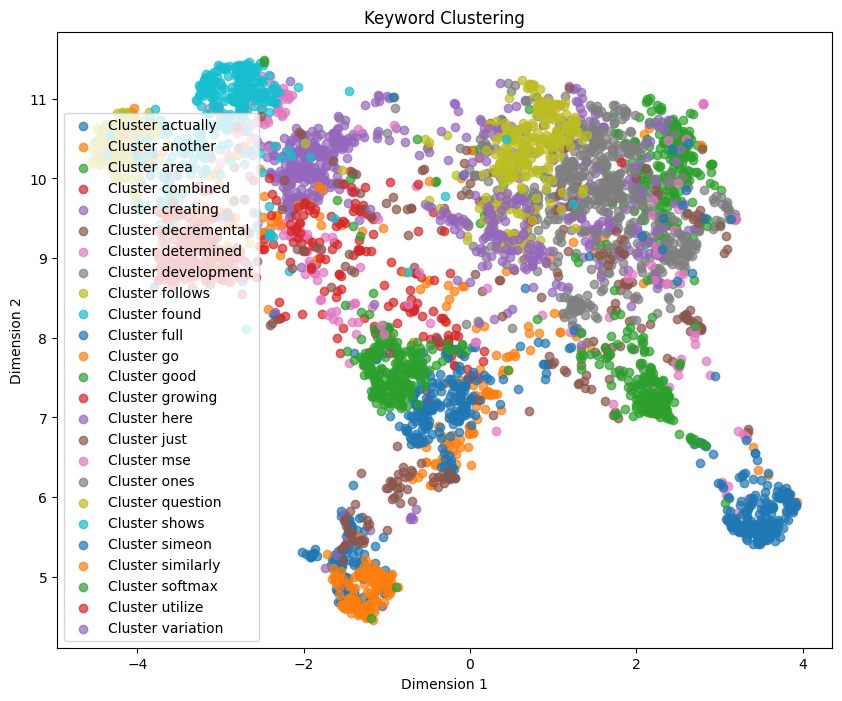

In [149]:
vizualization.viz_umap.plot_in_2d(keyword_embeddings,None, representative_labels, "Keyword Clustering", show_legend=True)

In [228]:
#choose 5 random from cleaned_corpus
# sample_indices = np.random.choice(len(cleaned_corpus), 7, replace=False)
document_samples = [cleaned_corpus[i] for i in sample_indices]
original_documents = data.iloc[sample_indices]

selected_cluster_index = cluster_representatives.index("softmax")
selected_cluster_centroid = cluster_centers[selected_cluster_index]


In [231]:
print(original_documents.iloc[6])
print("-----------")
print(original_documents.iloc[2])

Dubhe: Towards Data Unbiasedness with Homomorphic Encryption in
  Federated Learning Client Selection   Federated learning (FL) is a distributed machine learning paradigm that
allows clients to collaboratively train a model over their own local data. FL
promises the privacy of clients and its security can be strengthened by
cryptographic methods such as additively homomorphic encryption (HE). However,
the efficiency of FL could seriously suffer from the statistical heterogeneity
in both the data distribution discrepancy among clients and the global
distribution skewness. We mathematically demonstrate the cause of performance
degradation in FL and examine the performance of FL over various datasets. To
tackle the statistical heterogeneity problem, we propose a pluggable
system-level client selection method named Dubhe, which allows clients to
proactively participate in training, meanwhile preserving their privacy with
the assistance of HE. Experimental results show that Dubhe is compara

In [218]:
sample_labels = [[to_full_name(categorizer.get_label_str(label)) for label in labels] for labels in [numerical_labels[i] for i in sample_indices]]

In [223]:
sample_titles = [text.replace("\n", "  ").split("  ")[0] for text in [data.iloc[i] for i in sample_indices]]

import textwrap

sample_titles_wrapped = ["\n".join(textwrap.wrap(sample_title, width=30))+" ..." for sample_title in sample_titles]

In [220]:
# compute cosine similarity of all words against centroid
from sklearn.metrics.pairwise import cosine_similarity

closenesses = []
for document_sample in document_samples:
    doc_closenesses = []
    for word in document_sample:
        if word in translator:
            doc_closenesses.append(cosine_similarity(translator[word].reshape(1,-1), selected_cluster_centroid.reshape(1,-1))[0][0])
    closenesses.append(doc_closenesses)

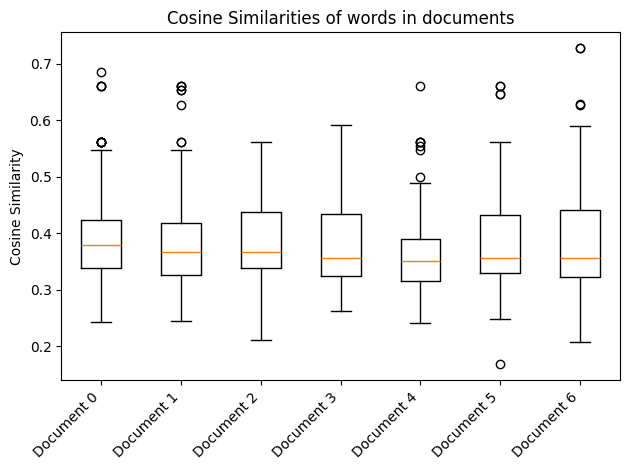

In [226]:
# create 5 boxplots side-by-side of the closenesses distributions
fig, ax = plt.subplots()

# Create side-by-side boxplots for the data
ax.boxplot(closenesses)

# Label each boxplot with custom names on the x-axis
ax.set_xticklabels([f"Document {i}" for i in range(len(closenesses))])
plt.xticks(rotation=45, ha="right", fontsize=10)

# Add labels and title
ax.set_ylabel('Cosine Similarity')
ax.set_title('Cosine Similarities of words in documents')


# save and display
plt.tight_layout()
plt.savefig('figures/boxplot_similarity_distances.png', dpi=300, bbox_inches='tight')
plt.show()

In [250]:
from sklearn.metrics.pairwise import cosine_similarity
document_embeddings = []

cosine_cache = {}
def cosine_cached(key, cluster_center, word_embedding):
    if key in cosine_cache:
        return cosine_cache[key]
    sim = cosine_similarity(cluster_center.reshape(1,-1), word_embedding.reshape(1, -1))
    cosine_cache[key] = sim
    return sim

for document in cleaned_corpus:
    # calculate the similarity between every word and the keyword_cluster_centers
    embeddable_words = [word for word in document if word in translator]
    document_word_embeddings = np.array([translator[word] for word in document if word in translator])
    # remove the bias from the document embeddings

    # for every center, average of the top 10% are chosen as similarity
    keyword_cluster_coefficients = []
    for i, cluster_center in enumerate(cluster_centers):
        similarities = np.array([cosine_cached(str(i)+"_"+word, cluster_center, word_embedd) for word, word_embedd in zip(embeddable_words,document_word_embeddings)])

        cutoff = max(5, int(0.05 * len(similarities)))
        score = np.mean(np.sort(similarities)[-cutoff:])
        keyword_cluster_coefficients.append(score)

    document_embeddings.append(keyword_cluster_coefficients)

final_document_embeddings = np.array(document_embeddings)

In [251]:

# min-max scale each dimension to [-1,1]
mins = np.min(final_document_embeddings, axis=0)
maxs = np.max(final_document_embeddings, axis=0)
final_document_embeddings = 2*(final_document_embeddings-mins)/(maxs-mins)-1

#normalize
from sklearn.preprocessing import normalize
norm_embedd = normalize(final_document_embeddings)




In [1]:
# set OPENAI_API_KEY environment variable
os.environ["OPENAI_API_KEY"] =""

NameError: name 'os' is not defined

In [252]:
data_list = list(data)

In [268]:
document_embeddings_openai = openai_embedding(data_list)[0]

In [253]:
n = len(numerical_labels)
label_occurances = {}
for label_list in numerical_labels:
    for label in label_list:
        label_occurances[label] = label_occurances.get(label, 0) + 1

label_idfs = {key: np.log2(n/value) for key, value in label_occurances.items()}



In [275]:
#random control
random_embedding = np.random.ranf(document_embeddings_openai.shape)

In [276]:
# silhuette-inspired_rating
target_embedding = random_embedding

unrelated_distances=[]
related_distances=[]
related_distances_weights=[]

for i, doc_embedding_1 in enumerate(target_embedding):
    for j, doc_embedding_2 in enumerate(target_embedding[i+1:]):
        j= j+i
        label_similarity = sum([label_idfs[label_1] for label_1 in numerical_labels[i] if label_1 in numerical_labels[j]])
        doc_distance = cosine_similarity(doc_embedding_1.reshape(1, -1), doc_embedding_2.reshape(1, -1))[0][0]
        if label_similarity == 0:
            unrelated_distances.append(doc_distance)
        else:
            related_distances.append(doc_distance)
            related_distances_weights.append(label_similarity)

mean_unrelated_distances = np.mean(unrelated_distances, axis=0)
mean_related_distances = np.average(related_distances, axis=0, weights=related_distances_weights)



In [277]:
min_distance = min(min(related_distances),min(unrelated_distances))
max_distance = max(max(related_distances),max(unrelated_distances))

In [278]:
final_score = (mean_related_distances - mean_unrelated_distances) / (max_distance - min_distance)
print(final_score)

0.00020810156151691872
